### BUILDING COMPLEX MODELS USING FUNCTIONAL API

If you want to sent a Subset of the Features through the wide path, and a differnt Subsets through the Deep Path.

+ Five Features through the Wide Path.
+ Six Features through the Deep Path.

We can solve Problems in Different Scenorios by Functional API method.
We can train one NN and can apply more than one tasks to do for the NN.

+ `Classify the main Object from the Picture -- Classification` and `Find Coordinates of the Object -- Regression`
+ Classify the Persons facial Expression is one task (smiling, surprised, sad etc) and another output can be given as whether they are wearing glasses or not.
+ We can also give one auxiliary output.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
## fetch the data.
housing = fetch_california_housing()
housing.keys()
# housing.data
# housing.target
# housing.target_names
# housing.feature_names
# housing.DESCR
# columns = ["MedInc","HouseAge","AveRooms","AveBedrms","Population","AveOccup","Latitude","Longitude"]
data = pd.DataFrame(housing.data, columns = housing.feature_names)
print(data.head())

## split the data to trainig and testing and validation sets.
print("============Splitting data to Training and Testing Sets===============")
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
print(X_train_full.shape)
print(X_test.shape)
print(y_train_full.shape)
print(y_test.shape)
print("============Splitting data to Training and Validation Sets===============")
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)
print(X_train.shape)
print(X_valid.shape)
print(y_train.shape)
print(y_valid.shape)
print("=============scale the Data using the Standard Scaler================")
## initialize the scaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  
============Splitting data to Training and Testing Sets===============
(15480, 8)
(5160, 8)
(15480,)
(5160,)
============Splitting data to Training and Validation Sets===============
(11610, 8)
(3870, 8)
(11610,)
(3870,)
=============scale the Data using the Standard Scaler================


In [7]:
## five features through the wide path.
input_A = keras.layers.Input(shape = [5], name = "wide_input")
## six features through the deep path
input_B = keras.layers.Input(shape = [6], name = "deep_input")
## define the hidden layer.
hidden1 = keras.layers.Dense(30, activation = "relu")(input_B)
## define the second hidden layer.
hidden2 = keras.layers.Dense(30, activation = "relu")(hidden1)
## concat the input A and hidden 2
concat = keras.layers.concatenate([input_A, hidden2])
## output layer.
output = keras.layers.Dense(1, name = "output")(concat)
## model defining.
model = keras.Model(inputs = [input_A, input_B], outputs = [output])
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 deep_input (InputLayer)        [(None, 6)]          0           []                               
                                                                                                  
 dense_2 (Dense)                (None, 30)           210         ['deep_input[0][0]']             
                                                                                                  
 wide_input (InputLayer)        [(None, 5)]          0           []                               
                                                                                                  
 dense_3 (Dense)                (None, 30)           930         ['dense_2[0][0]']                
                                                                                            

In [19]:
## now when doing the fit method.
## we will have to give X_train_A , X_train_B and X_valid_A, X_valid_B for the training and validation sets.
## so defining those parameters.
X_train_A, X_train_B = X_train[:,:5], X_train[:,2:]
print(X_train.shape)
print("A contains 5 features",X_train_A.shape)
print("B contains 6 features",X_train_B.shape)
X_valid_A, X_valid_B = X_valid[:,:5], X_valid[:,2:]
print(X_valid.shape)
print("A contains 5 features",X_valid_A.shape)
print("B contains 6 features",X_valid_B.shape)
X_test_A, X_test_B = X_test[:,:5], X_test[:,2:]
print(X_test.shape)
print("A contains 5 features",X_test_A.shape)
print("B contains 6 features",X_test_B.shape)
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]
print("A contains 5 features",X_new_A.shape)
print("B contains 6 features",X_new_B.shape)

(11610, 8)
A contains 5 features (11610, 5)
B contains 6 features (11610, 6)
(3870, 8)
A contains 5 features (3870, 5)
B contains 6 features (3870, 6)
(5160, 8)
A contains 5 features (5160, 5)
B contains 6 features (5160, 6)
A contains 5 features (3, 5)
B contains 6 features (3, 6)


In [24]:
## compile the model
model.compile(
                loss = "mse",
                optimizer = keras.optimizers.SGD(lr = 1e-3),
                metrics = "accuracy"
)

In [25]:
## train the model
history = model.fit(
                    (X_train_A, X_train_B),
                    y_train,
                    epochs = 30,
                    validation_data=((X_valid_A,X_valid_B), y_valid)
)

Epoch 1/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4462 - accuracy: 0.0031 - val_loss: 0.4322 - val_accuracy: 0.0023
Epoch 2/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4444 - accuracy: 0.0031 - val_loss: 0.4317 - val_accuracy: 0.0023
Epoch 3/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4431 - accuracy: 0.0031 - val_loss: 0.4294 - val_accuracy: 0.0023
Epoch 4/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4420 - accuracy: 0.0031 - val_loss: 0.4282 - val_accuracy: 0.0023
Epoch 5/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4404 - accuracy: 0.0031 - val_loss: 0.4284 - val_accuracy: 0.0023
Epoch 6/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4390 - accuracy: 0.0031 - val_loss: 0.4265 - val_accuracy: 0.0023
Epoch 7/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4376 - accuracy: 0.0031 - val_loss: 0.4253 - val_accuracy: 0.0023
Epoch 

In [26]:
## test the model
mse_test = model.evaluate((X_test_A, X_test_B), y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.4222 - accuracy: 0.0031


In [27]:
## predict the model
y_pred = model.predict((X_new_A, X_new_B))

1/1 [==============================] - 0s 78ms/step


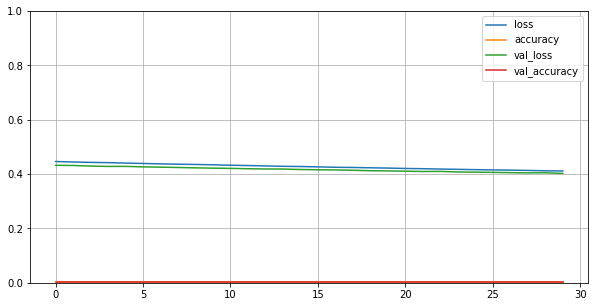

In [28]:
## plot the curve of the scores from the training.
## plotting the scores
pd.DataFrame(history.history).plot(figsize = (10,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

This is not a good Model that we can rely upon.

#### ADDING AN AUXILIARY OUTPUT

In [29]:
## five features through the wide path.
input_A = keras.layers.Input(shape = [5], name = "wide_input")
## six features through the deep path
input_B = keras.layers.Input(shape = [6], name = "deep_input")
## define the hidden layer.
hidden1 = keras.layers.Dense(30, activation = "relu")(input_B)
## define the second hidden layer.
hidden2 = keras.layers.Dense(30, activation = "relu")(hidden1)
## concat the input A and hidden 2
concat = keras.layers.concatenate([input_A, hidden2])
## output layer.
output = keras.layers.Dense(1, name = "main_output")(concat)
## adding the auxiliary output.
aux_output = keras.layers.Dense(1, name = "aux_output")(hidden2)
## model defining.
model = keras.Model(inputs = [input_A, input_B], outputs = [output, aux_output])
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 deep_input (InputLayer)        [(None, 6)]          0           []                               
                                                                                                  
 dense_4 (Dense)                (None, 30)           210         ['deep_input[0][0]']             
                                                                                                  
 wide_input (InputLayer)        [(None, 5)]          0           []                               
                                                                                                  
 dense_5 (Dense)                (None, 30)           930         ['dense_4[0][0]']                
                                                                                            

In [31]:
## compile the model
## we have to give the loss function to each outputs.
model.compile(
                loss = ["mse","mse"],
                optimizer = "sgd",
                metrics = "accuracy",
                loss_weights = [0.9, 1.0]
)

In [32]:
## train the model
## train the model
history = model.fit(
                    (X_train_A, X_train_B),
                    [y_train,y_train],
                    epochs = 20,
                    validation_data=([X_valid_A,X_valid_B], [y_valid, y_valid])
)

Epoch 1/20
363/363 [==============================] - 2s 3ms/step - loss: 1.8314 - main_output_loss: 0.8393 - aux_output_loss: 1.0760 - main_output_accuracy: 0.0030 - aux_output_accuracy: 0.0031 - val_loss: 1.2080 - val_main_output_loss: 0.5101 - val_aux_output_loss: 0.7489 - val_main_output_accuracy: 0.0023 - val_aux_output_accuracy: 0.0026
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 1.1953 - main_output_loss: 0.4890 - aux_output_loss: 0.7553 - main_output_accuracy: 0.0030 - aux_output_accuracy: 0.0031 - val_loss: 1.0536 - val_main_output_loss: 0.4684 - val_aux_output_loss: 0.6320 - val_main_output_accuracy: 0.0023 - val_aux_output_accuracy: 0.0026
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 1.0215 - main_output_loss: 0.4655 - aux_output_loss: 0.6025 - main_output_accuracy: 0.0030 - aux_output_accuracy: 0.0031 - val_loss: 0.9395 - val_main_output_loss: 0.4305 - val_aux_output_loss: 0.5521 - val_main_output_accuracy: 0.0023 - 

In [45]:
## evaluate the model
## when evaluating the model, keras will return the total loss as well as the individual loss.
total_loss,main_loss, aux_loss = model.evaluate([X_test_A, X_test_B], [y_test, y_test])

162/162 [==============================] - 0s 2ms/step - loss: 0.7349 - main_output_loss: 0.3568 - aux_output_loss: 0.4138 - main_output_accuracy: 0.0031 - aux_output_accuracy: 0.0031


ValueError: too many values to unpack (expected 3)

In [38]:
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

1/1 [==============================] - 0s 71ms/step


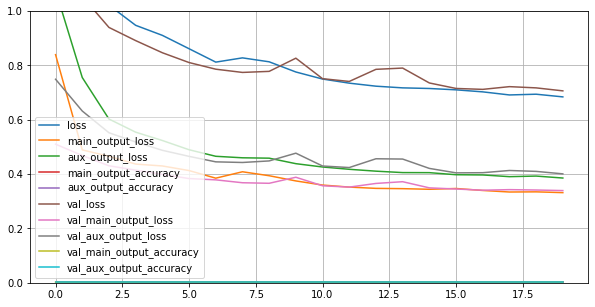

In [46]:
## plotting the scores
pd.DataFrame(history.history).plot(figsize = (10,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()